<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prerequisites</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Trainingsdata" data-toc-modified-id="Trainingsdata-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Trainingsdata</a></span></li></ul></li><li><span><a href="#Linear-hypothesis" data-toc-modified-id="Linear-hypothesis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear hypothesis</a></span></li><li><span><a href="#Creating-labels" data-toc-modified-id="Creating-labels-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating labels</a></span></li><li><span><a href="#Plotting-dataset" data-toc-modified-id="Plotting-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting dataset</a></span></li><li><span><a href="#Feature-scaling" data-toc-modified-id="Feature-scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature scaling</a></span><ul class="toc-item"><li><span><a href="#Alternative" data-toc-modified-id="Alternative-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Alternative</a></span></li></ul></li><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Gradient descent</a></span><ul class="toc-item"><li><span><a href="#Costfunction" data-toc-modified-id="Costfunction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Costfunction</a></span></li><li><span><a href="#Calculating-thetas" data-toc-modified-id="Calculating-thetas-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Calculating thetas</a></span></li><li><span><a href="#Minimizing-theta" data-toc-modified-id="Minimizing-theta-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Minimizing theta</a></span></li></ul></li><li><span><a href="#Plotting-solutions" data-toc-modified-id="Plotting-solutions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plotting solutions</a></span></li></ul></div>

# Prerequisites

## Imports

In [1]:
import numpy as np

# for plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Trainingsdata
artificial union distributed matrix with 2 columns and $n$ rows 

In [2]:
n = 100
X = np.append(np.ones((n, 1)), np.random.uniform(-5, 5, (n, 2)), axis=1)
X.shape

(100, 3)

# Linear hypothesis

$$
h_\vec{\theta_{}} = X * \vec{\theta_{}}
\; with \; X\in  \mathbb{R}^{n \times 3} \; and \; \vec{\theta_{}}\in \mathbb{R}^{3 \times 1}$$

$$
h_i = \sum_{k = 0} X_{ik} \cdot \theta_k
$$

$$ Note: \; X = \begin{bmatrix} \vec{x_{0}} , \vec{x_{1}}, \vec{x_{2}}\end{bmatrix} \; with \; \vec{x_{0}} = \begin{bmatrix} 1 \\ 1 \\\vdots \\ 1 \\ 1\end{bmatrix} \; and \; \vec{x_{0}} \in \mathbb{R}^{n \times 1}  $$

In [3]:
def linear_hypothesis(theta):
    return lambda x: np.dot(x, theta)

# Creating labels 

In [4]:
theta = np.random.randn(X.shape[1], 1)
h = linear_hypothesis(theta)
y_linear = h(X)
y_gaussian = np.random.normal(y_linear, 0.1)

# Plotting dataset

Text(0.5,0,'Y')

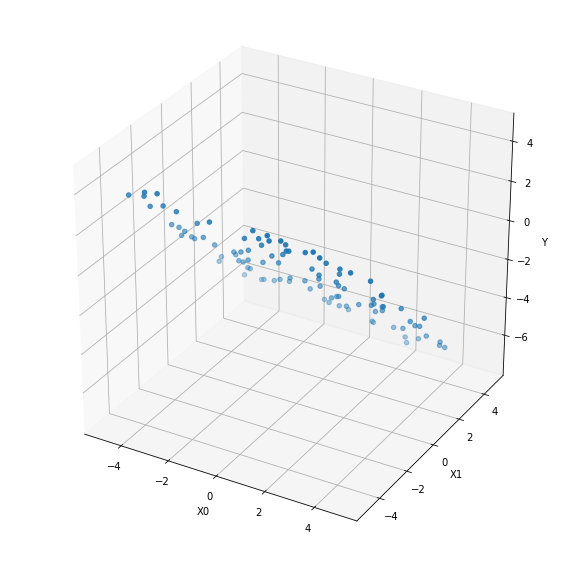

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.T[1], X.T[2], y_gaussian)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')

# Feature scaling
Standardize our data so that our data has $\mu = 0 $ and $\sigma^2 = 1$

$$
x _ { j } ^ { \prime } = \frac { x _ { j } - \mu _ { j } } { \sigma \left( x _ { j } \right) } \; therefore \; x^\prime \sim \mathcal { N } ( 0,1 )
$$

$$
\mu _ { j } = \overline { x _ { j } } = \frac{1}{m} \sum _ { i } x _ { j } ^ { ( i ) }
$$

$$
\sigma(x_j)= \operatorname { std } \left( x _ { j } \right) = \sqrt { \operatorname { var } \left( x _ { j } \right) }
$$

$$
\sigma(x_j)^2 =
\operatorname { var } \left( x _ { j } \right) = \overline { \left( x _ { j } - \mu _ { j } \right) ^ { 2 } } = \overline { x _ { j } ^ { 2 } } - \mu _ { j } ^ { 2 }
$$

In [6]:
def feature_scaling(data):
    mu = 1/len(data) * np.sum(data, axis=0)
    sigma_square = 1/len(data) * (np.sum(data ** 2, axis=0) - mu ** 2)
    sigma = np.sqrt(np.abs(sigma_square))
    return (data - mu)/sigma

In [7]:
X_standardized = feature_scaling(X)
print('data without feature scaling, max:', np.max(X), 'min:', np.min(X))
print('data with feature scaling, max:', np.max(
    X_standardized), 'min:', np.min(X_standardized))

data without feature scaling, max: 4.97656559121 min: -4.91504003879
data with feature scaling, max: 1.76272952766 min: -1.82249816477


## Alternative

$$
x ^ { \prime } = \frac { x - average ( x ) } { max(x) - \min ( x ) }
$$

In [8]:
def feature_scaling_alt(data):
    return (data - np.average(data))/(np.max(data) - np.min(data))


X_alt = feature_scaling_alt(X)
print('data with alternative feature scaling, max:', np.max(
    X_alt), 'min:', np.min(X_alt))

data with alternative feature scaling, max: 0.464023309842 min: -0.535976690158


# Gradient descent

## Costfunction

$$
J ( \vec { \Theta_{} } ) = \frac { 1 } { 2 m } \sum _ { i = 1 } ^ { m } \left( h _ { \vec{\theta_{}} } \left( X \right)_i - y_i \right) ^ { 2 }
$$

In [9]:
def cost_function(x, y, hypothesis):
    return lambda theta: 1/(2*len(theta)) * np.sum((hypothesis(theta)(x) - y)**2, axis=0)

## Calculating thetas

$$
\frac{\partial J(\vec{\theta_{}})}{\partial \theta_j} = 
\frac{1}{m} \sum^m_{i=1} \left( h _ { \vec{\theta_{}} } \left( X \right)_i - y_i \right)
\frac{\partial \left( h _ { \vec{\theta_{}} } \left( X \right)_i - y_i \right)}{\partial \theta_j} = \\
\frac{1}{m} \sum^m_{i=1} \left(\sum_{k = 0} x_{ik} \cdot \theta_k - y _i \right)
\frac{\partial \left(\sum_{k = 0} x_{ik} \cdot \theta_k - y _i \right)}{\partial \theta_j}= \\
\frac{1}{m} \sum^m_{i=1} \left(\sum_{k = 0} X_{ik} \cdot \theta_k - y_i \right)
x_{ij} = \\
\frac{1}{m} \sum^m_{i=1} x_{ij}\left((X *\vec{\theta_{}})_i - y_i \right)
 = \\
\frac{1}{m} \sum^m_{i=1} x_{ij} \left(X *\vec{\theta_{}} - \vec{y_{}} \right)_i = \\
\frac{1}{m} \sum^m_{i=1} x_{ji}^T * \left( X * \vec{\theta_{}} - \vec{y_{}}\right)_i = \\
=
\frac{1}{m} \left( X^T * \left( X * \vec{\theta_{}} - \vec{y_{}}\right)\right)
$$

In [10]:
def compute_new_theta(x, y, theta, alpha):
    return theta - alpha * 1 / len(theta) * x.T.dot(linear_hypothesis(theta)(x) - y)

## Minimizing theta

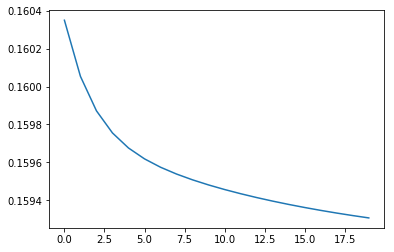

In [11]:
def gradient_descent(alpha, theta, iterations, x, y):
    cost_history = []
    c = cost_function(x, y, linear_hypothesis)
    for i in range(iterations):
        old = theta
        theta = compute_new_theta(x, y, theta, alpha)
        cost_history.append(c(theta))
    plt.plot(range(0, iterations), cost_history)
    plt.show()
    return cost_history, theta


cost_history, opt_theta = gradient_descent(0.001, theta, 20, X, y_gaussian)

# Plotting solutions

In [12]:
m = 10000
X_fit = np.append(np.ones((m, 1)), np.random.uniform(-5, 5, (m, 2)), axis=1)
y_fit = linear_hypothesis(opt_theta)(X_fit)

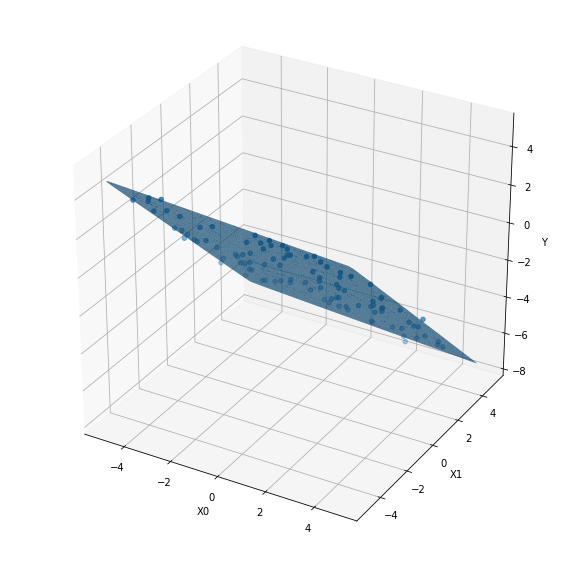

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.T[1], X.T[2], y_gaussian)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
ax.plot_trisurf(X_fit.T[1], X_fit.T[2], y_fit.reshape(m))